# Waste Production Prediction Using Decision Trees

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
default_data = pd.read_excel("Waste_Audit_Fake_Data.xlsx", skiprows=[0])

In [3]:
default_data.head()

,Building Name,Typology Group,Typology,Sub-Type Group,Sub-Type,GFA,Est. Average Daily Occupancy (Continuous Basis),Audit 1,Audit 2,Audit 3,Audit 4,Audit 5,audit_avg,Waste Production Category
0,B1246Z,5,Industrial,12,Manufacturing,18559,298,1011,1190,1027,1115,1288,1126.2,Moderate Waste Production (1000-1500KG)
1,B1779Q,3,Educational,7,Nurseries,6470,262,828,920,828,676,884,827.2,Low Waste Production (500-1000KG)
2,B1857X,2,Residential,4,Landed Property,2158,6,12,15,12,10,10,11.8,Lowest Waste Production (<500KG)
3,B1646W,4,Institutional,11,Fire Station,10346,125,370,242,206,387,213,283.6,Lowest Waste Production (<500KG)
4,B1461W,6,Storage,15,Garage,120050,544,980,1184,1121,1031,1243,1111.8,Moderate Waste Production (1000-1500KG)


In [4]:
default_data.isnull().sum()

Building Name                                      0
Typology Group                                     0
Typology                                           0
Sub-Type Group                                     0
Sub-Type                                           0
GFA                                                0
Est. Average Daily Occupancy (Continuous Basis)    0
Audit 1                                            0
Audit 2                                            0
Audit 3                                            0
Audit 4                                            0
Audit 5                                            0
audit_avg                                          0
Waste Production Category                          0
dtype: int64

In [5]:
default_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Building Name                                    440 non-null    object 
 1   Typology Group                                   440 non-null    int64  
 2   Typology                                         440 non-null    object 
 3   Sub-Type Group                                   440 non-null    int64  
 4   Sub-Type                                         440 non-null    object 
 5   GFA                                              440 non-null    int64  
 6   Est. Average Daily Occupancy (Continuous Basis)  440 non-null    int64  
 7   Audit 1                                          440 non-null    int64  
 8   Audit 2                                          440 non-null    int64  
 9   Audit 3                         

In [6]:
default_data.describe()

,Typology Group,Sub-Type Group,GFA,Est. Average Daily Occupancy (Continuous Basis),Audit 1,Audit 2,Audit 3,Audit 4,Audit 5,audit_avg
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,3.445455,8.261364,41802.281818,5246.422727,973.818182,970.290909,968.347727,960.065909,979.100000,970.324545
std,1.552932,4.077535,50198.978462,8836.938287,1146.025676,1114.653237,1148.462724,1099.077371,1134.811372,1096.151030
min,1.000000,1.000000,1024.000000,2.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000
25%,2.000000,5.000000,8272.750000,186.750000,310.500000,315.000000,342.500000,296.250000,311.500000,309.950000
50%,3.000000,8.000000,11669.000000,469.000000,785.500000,833.000000,768.000000,834.000000,798.000000,798.300000
75%,5.000000,12.000000,95953.750000,6838.250000,1099.000000,1117.000000,1078.750000,1095.250000,1111.250000,1091.200000
max,6.000000,15.000000,169355.000000,29942.000000,5906.000000,5974.000000,5766.000000,5863.000000,5706.000000,5396.800000


In [7]:
# default_data['Audit 1'].mean(axis=1)
# df = pd.DataFrame(default_data, index =['Audit 1','Audit 2','Audit 3','Audit 4','Audit 5'])

audit_avg = default_data[['Audit 1','Audit 2','Audit 3','Audit 4','Audit 5']].mean(axis=1)
default_data['audit_avg'] = audit_avg

In [8]:
default_data['Waste Production Category'].value_counts()

Lowest Waste Production (<500KG)                  144
Low Waste Production (500-1000KG)                 133
Moderate Waste Production (1000-1500KG)           124
Highest Waste Production (>3500KG)                 34
Moderately High Waste Production (1500-2000KG)      5
Name: Waste Production Category, dtype: int64

In [9]:
default_data.rename(columns={'Est. Average Daily Occupancy (Continuous Basis)':'Daily_Occupancy'},
inplace=True)

In [10]:
default_data

,Building Name,Typology Group,Typology,Sub-Type Group,Sub-Type,GFA,Daily_Occupancy,Audit 1,Audit 2,Audit 3,Audit 4,Audit 5,audit_avg,Waste Production Category
0,B1246Z,5,Industrial,12,Manufacturing,18559,298,1011,1190,1027,1115,1288,1126.2,Moderate Waste Production (1000-1500KG)
1,B1779Q,3,Educational,7,Nurseries,6470,262,828,920,828,676,884,827.2,Low Waste Production (500-1000KG)
2,B1857X,2,Residential,4,Landed Property,2158,6,12,15,12,10,10,11.8,Lowest Waste Production (<500KG)
3,B1646W,4,Institutional,11,Fire Station,10346,125,370,242,206,387,213,283.6,Lowest Waste Production (<500KG)
4,B1461W,6,Storage,15,Garage,120050,544,980,1184,1121,1031,1243,1111.8,Moderate Waste Production (1000-1500KG)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,BO00733E,1,Commercial,1,Retail Mixed,22253,3200,1200,450,1480,2150,750,1206.0,Moderate Waste Production (1000-1500KG)
436,BO00773C,1,Commercial,1,Retail Mixed,12150,2154,650,830,0,950,310,548.0,Low Waste Production (500-1000KG)
437,BO0134N,1,Commercial,3,Retail Non-Food,11550,750,120,135,0,0,60,63.0,Lowest Waste Production (<500KG)
438,BO0143E,1,Commercial,2,Office,7500,165,40,25,45,0,0,22.0,Lowest Waste Production (<500KG)


In [11]:
default_data.dtypes

Building Name                 object
Typology Group                 int64
Typology                      object
Sub-Type Group                 int64
Sub-Type                      object
GFA                            int64
Daily_Occupancy                int64
Audit 1                        int64
Audit 2                        int64
Audit 3                        int64
Audit 4                        int64
Audit 5                        int64
audit_avg                    float64
Waste Production Category     object
dtype: object

### Simple Decision Tree

#### Response Variable : Waste Production Category
#### Predictor Feature: GFA

In [12]:
wpc = pd.DataFrame(default_data['Waste Production Category'])  # Response
gfa = pd.DataFrame(default_data['GFA'])      # Predictor

Set up the classification problem with Train and Test datasets.
Train Set with 400 samples and Test Set with 40 samples.

In [13]:
# Train Set : 400 samples
wpc_train = pd.DataFrame(wpc[:400])
gfa_train = pd.DataFrame(gfa[:400])

# Test Set : 400 samples
wpc_test = pd.DataFrame(wpc[-40:])
gfa_test = pd.DataFrame(gfa[-40:])

# Check the sample sizes
print("Train Set :", wpc_train.shape, gfa_train.shape)
print("Test Set  :", wpc_test.shape, gfa_test.shape)

Train Set : (400, 1) (400, 1)
Test Set  : (40, 1) (40, 1)


In [14]:
type(gfa_train["GFA"])

pandas.core.series.Series

#### Basic Exploration
##### Perform basic statistical exploration and visualization on the Train Set.

In [15]:
# Summary Statistics for wpc Train
wpc_train["Waste Production Category"].value_counts()

Lowest Waste Production (<500KG)                  134
Low Waste Production (500-1000KG)                 120
Moderate Waste Production (1000-1500KG)           109
Highest Waste Production (>3500KG)                 32
Moderately High Waste Production (1500-2000KG)      5
Name: Waste Production Category, dtype: int64

In [16]:
# Summary Statistics for gfa Train
gfa_train.describe()

,GFA
count,400.000000
mean,41479.455000
std,50099.157108
min,1024.000000
25%,8081.750000
50%,11563.000000
75%,95953.750000
max,169355.000000


C:\Users\Hongren\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Waste Production Category', ylabel='count'>

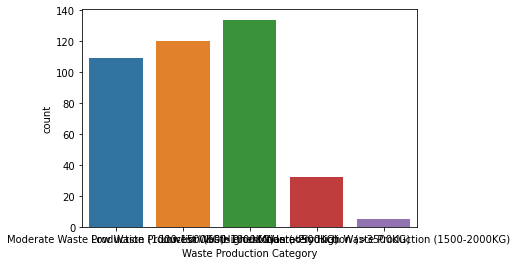

In [17]:
# Count Plot for wpc Train
sb.countplot(wpc_train["Waste Production Category"])

C:\Users\Hongren\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

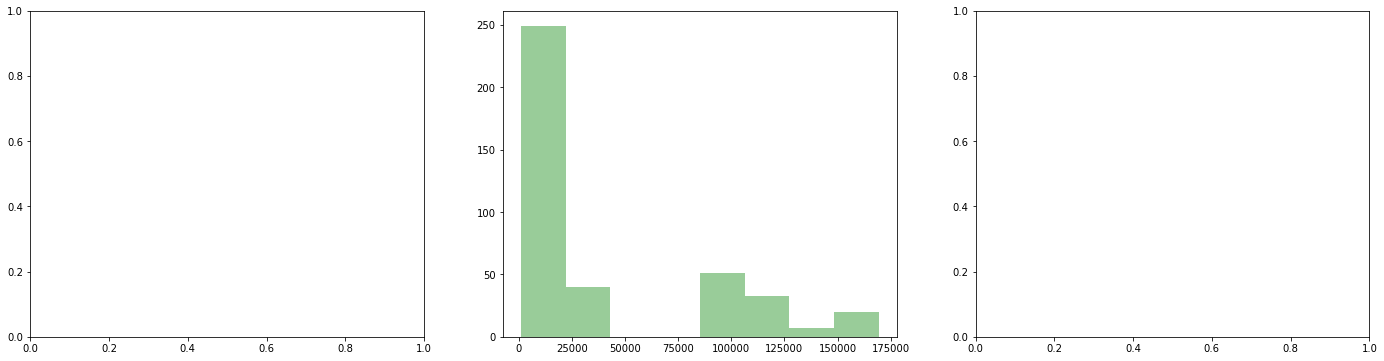

In [18]:
# Plot the distributions of GFA Train
f, axes = plt.subplots(1, 3,figsize=(24, 6))
sb.distplot(gfa_train, kde = False, ax = axes[1], color = "g")


#### Decision Tree in Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `DecisionTreeClassifier` model from `sklearn.tree`.

In [19]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `total_train` as *Predictor* and `legnd_train` as *Response*.

In [20]:
# Train the Decision Tree Classifier model
dectree.fit(gfa_train, wpc_train)

DecisionTreeClassifier(max_depth=2)

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.5025


<AxesSubplot:>

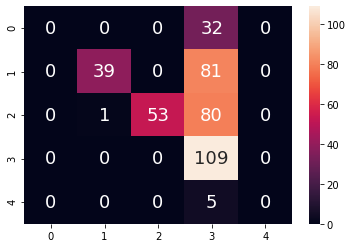

In [21]:
# Predict WPC corresponding to GFA Train
gfa_train_pred = dectree.predict(gfa_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(gfa_train, wpc_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(wpc_train, gfa_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Check how good the predictions are on the Test Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.525


<AxesSubplot:>

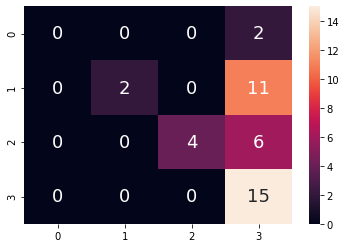

In [22]:
# Predict wpc corresponding to gfa Test
wpc_test_pred = dectree.predict(gfa_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(gfa_test, wpc_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(wpc_test, wpc_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Classification Tree with Random Train-Test Split

Split the Train and Test sets randomly, and perform Classification.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5363636363636364

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4090909090909091



<AxesSubplot:>

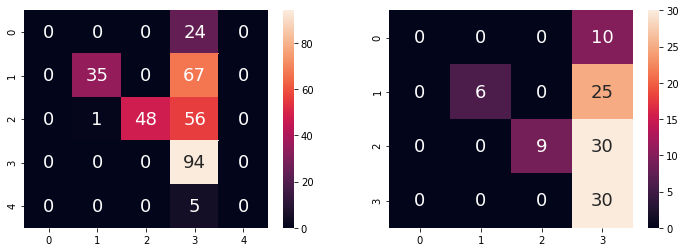

In [23]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.tree import export_graphviz
#import graphviz

# Recall the WPC-GFA Dataset
wpc = pd.DataFrame(default_data['Waste Production Category'])   # Response
gfa = pd.DataFrame(default_data['GFA'])       # Predictor

# Split the WPC-GFA Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(gfa, wpc, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict WPC values corresponding to GFA
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Multi-Variate Classification Tree

We will start by setting up a Multi-Variate Classification problem.   

Response Variable : **WPC**     
Predictor Feature : **Typology Group, Sub-Type Group, GFA, Daily_Occupancy**       

Extract the variables and the associated data as a Pandas `DataFrame`.

In [24]:
# Extract Response and Predictors
y = pd.DataFrame(default_data["Waste Production Category"])
X = pd.DataFrame(default_data[["Typology Group", "Sub-Type Group", "GFA", "Daily_Occupancy"]])

Set up the classification problem with Train and Test datasets. 

In [25]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (330, 1) (330, 4)
Test Set  : (110, 1) (110, 4)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [26]:
# Summary Statistics for Response
y_train["Waste Production Category"].value_counts()

Lowest Waste Production (<500KG)                  109
Moderate Waste Production (1000-1500KG)            98
Low Waste Production (500-1000KG)                  93
Highest Waste Production (>3500KG)                 27
Moderately High Waste Production (1500-2000KG)      3
Name: Waste Production Category, dtype: int64

In [27]:
# Summary Statistics for Predictors
X_train.describe()

,Typology Group,Sub-Type Group,GFA,Daily_Occupancy
count,330.000000,330.000000,330.000000,330.000000
mean,3.448485,8.272727,42809.042424,5350.245455
std,1.568714,4.114418,50211.054436,8805.683806
min,1.000000,1.000000,1052.000000,2.000000
25%,2.000000,5.000000,8530.500000,202.750000
50%,3.000000,8.000000,13398.000000,492.500000
75%,5.000000,12.000000,96740.000000,7139.750000
max,6.000000,15.000000,169355.000000,29942.000000


C:\Users\Hongren\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Waste Production Category', ylabel='count'>

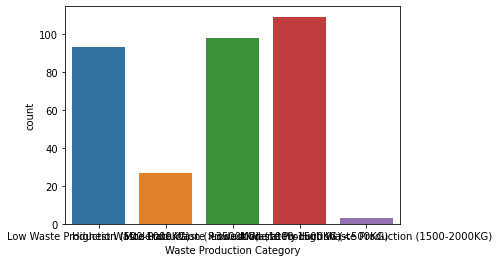

In [28]:
# Draw the distribution of Response
sb.countplot(y_train["Waste Production Category"])

C:\Users\Hongren\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Hongren\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hongren\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

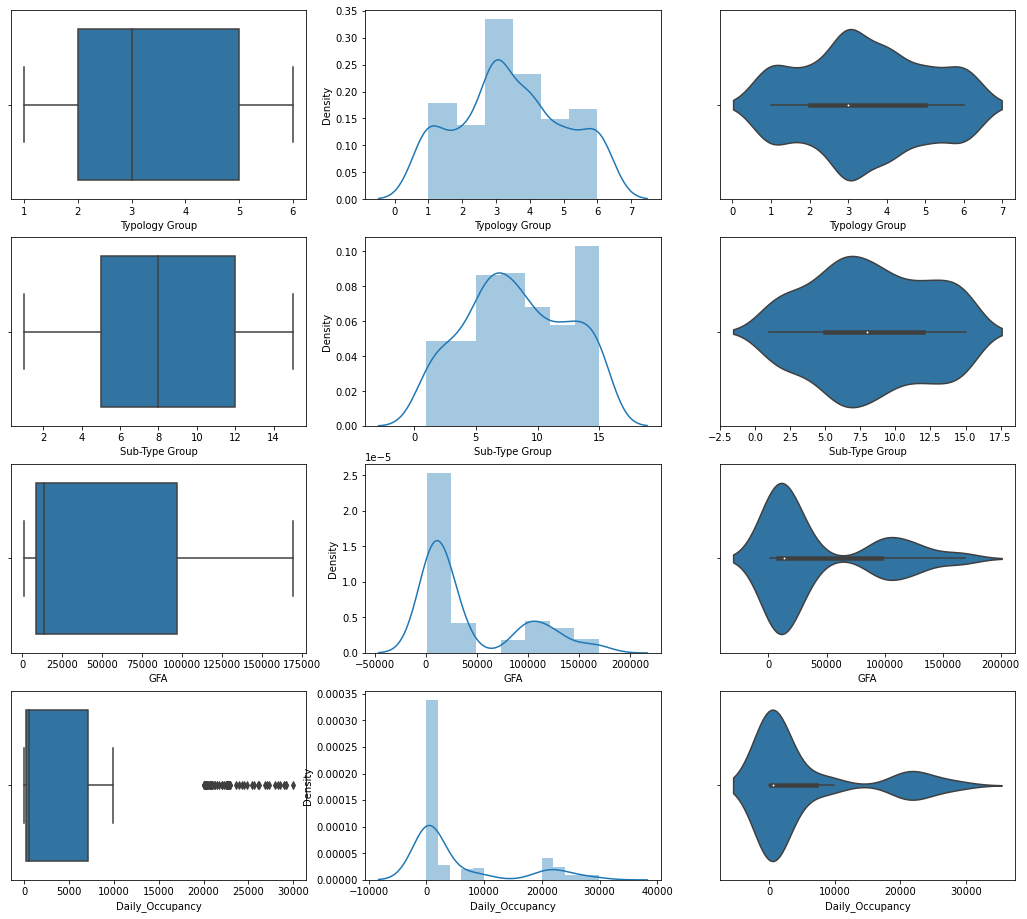

In [29]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

#### Goodness of Fit of the Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6545454545454545



<AxesSubplot:>

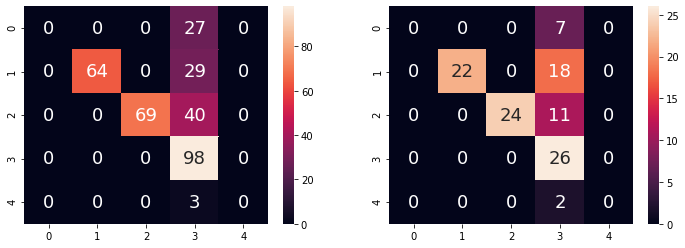

In [30]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict WPC values corresponding to GFA
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Prediction using a Classification Tree

Once we have trained a Multi-Variate Classification Tree, we may use it to predict **Waste Production Category** for any particular Pokemon. 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7636363636363637

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7909090909090909



<AxesSubplot:>

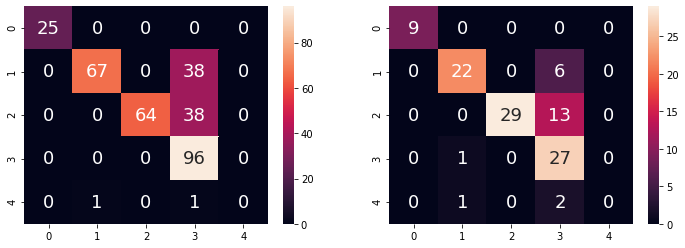

In [31]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Typology Group", "Sub-Type Group", "GFA", "Daily_Occupancy"]

y = pd.DataFrame(default_data['Waste Production Category'])
X = pd.DataFrame(default_data[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Distribution of Responses

In [32]:
# Extract Response and Predictors
predictors = ["Typology Group", "Sub-Type Group", "GFA", "Daily_Occupancy"]

y = pd.DataFrame(default_data['Waste Production Category'].astype('category'))
X = pd.DataFrame(default_data[predictors])

C:\Users\Hongren\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Waste Production Category', ylabel='count'>

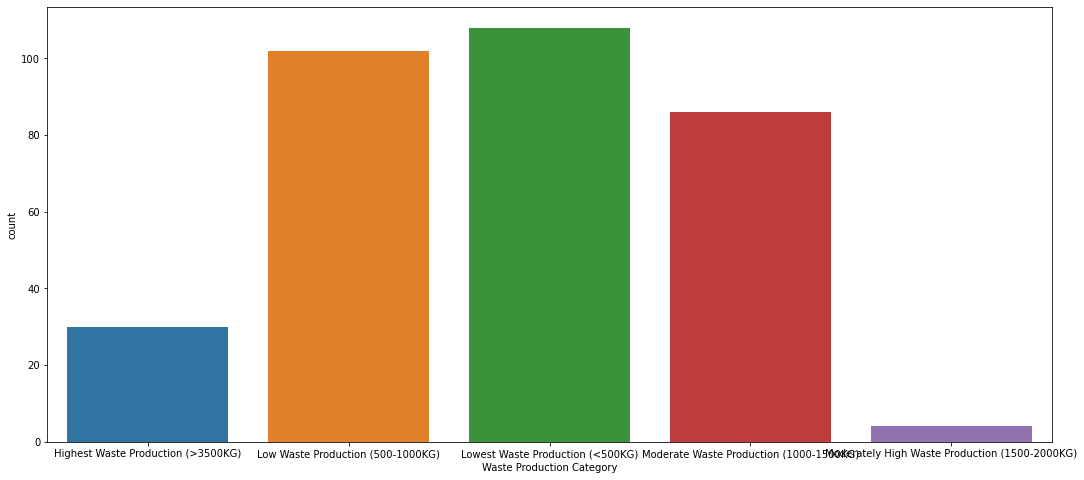

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
f, axes = plt.subplots(1, 1, figsize=(18, 8))
sb.countplot(y_train["Waste Production Category"])